In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("data/heartdisease.csv",delimiter=',')

In [3]:
#filling nan data with median values
col_median = np.nanmedian(data,axis=0)
ind = np.where(np.isnan(data))
data[ind] = np.take(col_median,ind[1])

In [4]:
train_data = data[:3400,:-1]
test_data = data[3400:,:-1]
y_train = data[:3400,-1]
y_test = data[3400:,-1]
y_test = y_test.reshape([len(y_test),1])
y_train = y_train.reshape([len(y_train),1])

In [5]:
#feature scaling
mean = np.mean(train_data,axis=0)
maxi = np.max(train_data,axis=0)
mini = np.min(train_data,axis=0)
train_data-=mean
train_data/=(maxi-mini)
test_data-=mean
test_data/=(maxi-mini)


#### Creating Biased training data

In [6]:
ind_one = np.where(y_train == 1)
ind_one = ind_one[0]
ind_zero = np.where(y_train == 0)
ind_zero = (ind_zero[0])[:1000]
X = np.r_[train_data[ind_one],train_data[ind_zero]]
y_train = np.r_[y_train[ind_one],y_train[ind_zero]]

In [7]:
len(y_train)

1517

In [8]:
X = np.c_[np.ones(len(X)),X]
test_data = np.c_[np.ones(len(test_data)),test_data]
m = len(train_data)
cost = []
theta = np.zeros([X.shape[1],1])
alpha = 0.5;
for i in range(10000):
    z = np.dot(X,theta)
    h = 1/(1+np.exp(z*(-1)))
    cost.append(np.mean(-1*((y_train)*np.log(h)+(1-y_train)*np.log(1-h)),axis=0))
    theta -= np.dot(np.transpose(X),h-y_train)*alpha*(1/m)

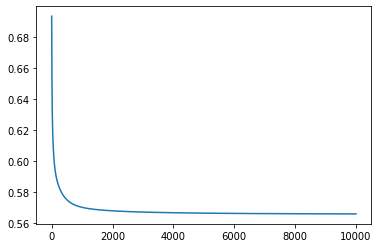

In [9]:
plt.plot(cost)
plt.show()

In [10]:
false_positive = 0
missed = 0
correct = 0
z = np.dot(test_data,theta)
h = 1/(1+np.exp(z*(-1)))
for i in range(len(test_data)):
    p = round(h[i][0])
    if p == y_test[i] and p == 1:
        correct+=1;
    elif p == 1 and y_test[i] == 0:
        false_positive+=1
    elif p==0 and y_test[i] == 1:
        missed += 1

In [11]:
print("false positives:"+str(false_positive)+" missed:"+str(missed)+" correct:"+str(correct))

false positives:97 missed:76 correct:51
